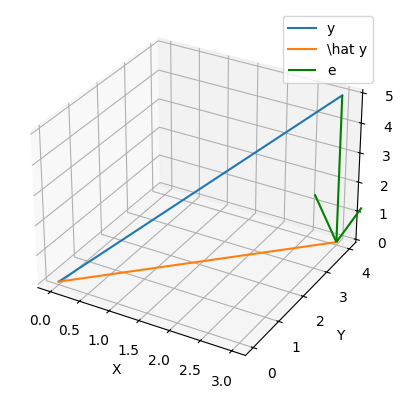

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义点a和点b的坐标
a = np.array([0, 0, 0])
b = np.array([3, 4, 5])

# 创建3D图形和坐标轴
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制直线y
ax.plot3D([a[0], b[0]], [a[1], b[1]], [a[2], b[2]], label='y')

# 计算直线在xy平面上的投影点
# 投影点的z坐标为0
projected_point = (b[0], b[1], 0)

# 绘制投影线$\hat y$
ax.plot3D([projected_point[0], a[0]], [projected_point[1], a[1]], [projected_point[2], a[2]], label='\hat y')

# 计算从点b到投影点的向量
vector_b_to_projected = np.array([projected_point[0] - b[0], projected_point[1] - b[1], projected_point[2] - b[2]])

# 绘制从点b到投影点的垂线e
# 为了绘制垂线，我们需要一个箭头，箭头的位置是点b，方向是向量b_to_projected
ax.quiver3D(b[0], b[1], b[2], vector_b_to_projected[0], vector_b_to_projected[1], vector_b_to_projected[2], color='g', label='e')

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 显示图例
ax.legend()

# 显示图形
plt.show()

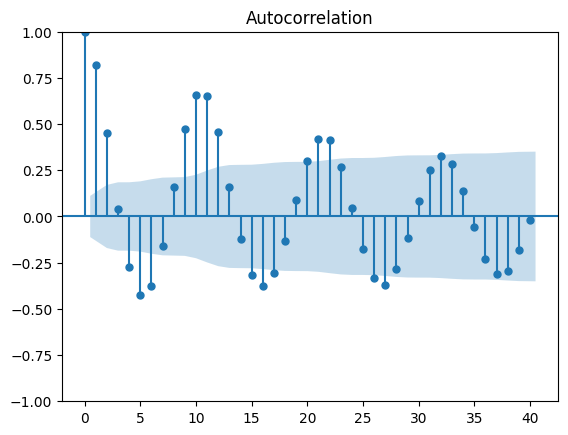

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 加载太阳黑子数据集
dta = sm.datasets.sunspots.load_pandas().data
# 设置索引为时间序列
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
# 删除不必要的列
del dta["YEAR"]
# 绘制自相关图，滞后40
sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40)
# 显示图形
plt.show()

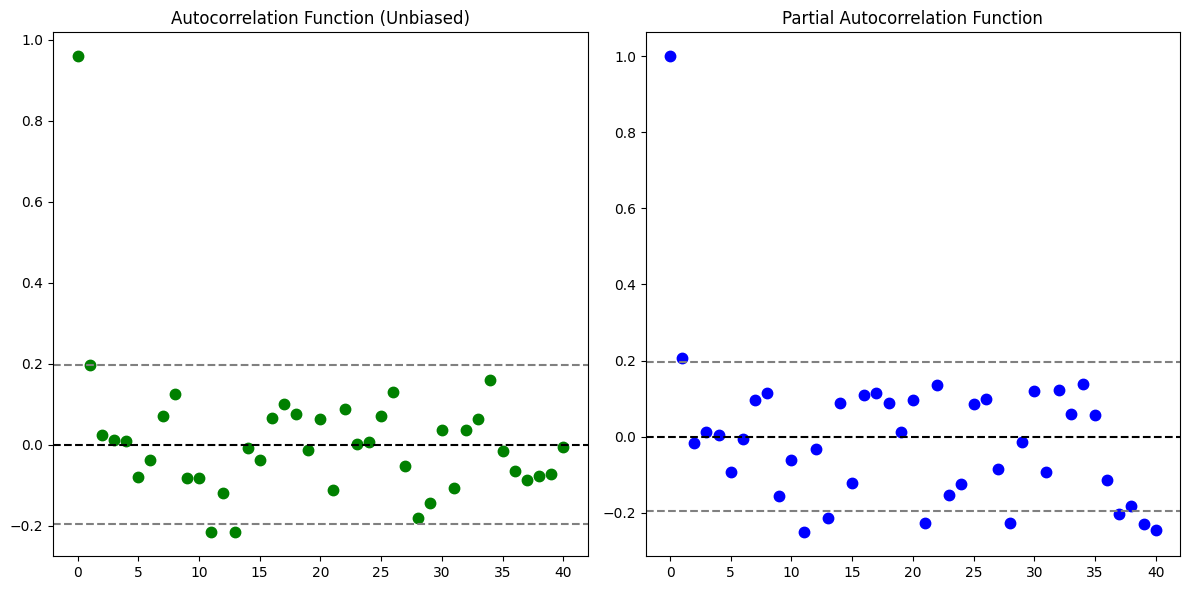

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

# 假设data是一个时间序列数据
data = np.random.randn(100)

# 计算自相关系数
acf_coefficients = acf(data, nlags=40)

# 计算样本方差
sample_variance = np.var(data, ddof=1)

# 将自相关系数除以样本方差的n-1倍根以得到未偏的自相关系数
unbiased_acf_coefficients = acf_coefficients / np.sqrt(sample_variance)

# 绘制ACF图
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(unbiased_acf_coefficients, 'g.', markersize=15)
plt.axhline(y=0, linestyle='--', color='black')
plt.axhline(y=-1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.title('Autocorrelation Function (Unbiased)')

# 绘制PACF图
plt.subplot(1, 2, 2)
plt.plot(pacf(data, nlags=40), 'b.', markersize=15)
plt.axhline(y=0, linestyle='--', color='black')
plt.axhline(y=-1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

In [2]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# 假设我们有一些数据
x = np.random.randn(100, 2)  # 自变量
x = sm.add_constant(x)  # 添加常数项
y = np.dot(x[:, 1:], np.array([1.0, 2.0])) + np.random.randn(100)  # 因变量

# 初始OLS回归
model_ols = sm.OLS(y, x).fit()
print("Durbin-Watson统计量（初始）:", durbin_watson(model_ols.resid))

# Cochrane-Orcutt迭代过程
converged = False
iterations = 0
max_iterations = 10  # 设置最大迭代次数
tolerance = 0.001  # 设置收敛容差

while not converged and iterations < max_iterations:
    # 拟合AR(1)模型来估计自相关系数
    rho = sm.OLS(model_ols.resid, sm.add_constant(np.arange(1, len(model_ols.resid) + 1))).fit().params[1]
    
    # 使用Cochrane-Orcutt变换调整误差项
    x_chol = sm.add_constant(x[:, 1:])  # 移除第一列（常数项）
    z = np.eye(x.shape[0])
    z[:, 1:] -= rho * np.roll(x_chol, shift=-1, axis=0)[:, 1:]
    y_adj = (y - rho * np.roll(y, shift=-1)).dropna()  # 调整因变量并删除缺失值
    x_adj = z.drop([0])  # 删除第一行
    
    # 重新进行OLS回归
    model_ols_new = sm.OLS(y_adj, sm.add_constant(x_adj)).fit()
    
    # 检查是否收敛
    if abs(rho) < tolerance:
        converged = True
    else:
        model_ols = model_ols_new  # 更新模型为新迭代的结果
        iterations += 1
        print(f"迭代 {iterations}, 自相关系数: {rho}, Durbin-Watson统计量:", durbin_watson(model_ols.resid))

# 最终模型摘要
print(model_ols_new.summary())

NameError: name 'pd' is not defined

In [44]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

# 读取原始数据
icecream = pd.read_stata('../Econometrics_CQ/2_Data/Data-2e/icecream.dta')
X = icecream[['temp','price','income']]
y = icecream['consumption']
X = sm.add_constant(X)

# 初始OLS回归
model = sm.OLS(y,X)
results = model.fit()

# 计算滞后误差项
resid = pd.DataFrame()
for i in range(len(icecream)):
    lag_n = f'lag_{i}'
    resid[lag_n] = results.resid.shift(i)


# Cochrane-Orcutt迭代过程
converged = False
iterations = 0
max_iterations = 10  # 设置最大迭代次数
tolerance = 0.001  # 设置收敛容差
hat_rho = [0]
results_list = []


while not converged and iterations < max_iterations:
    # 拟合AR(1)模型来估计自相关系数
    
    # 残差数据处理
    lag_X = 'lag_{}'.format(iterations+1)
    lag_y = 'lag_{}'.format(iterations)
    resid_ols = resid.copy()[[lag_y, lag_X]]
    resid_ols.dropna(inplace=True)
    
    # 进行AR(1)模型拟合
    resid_X = resid_ols[lag_X]
    resid_y = resid_ols[lag_y]
    # X = sm.add_constant(X) # 不加入常数项效果更好
    rho = sm.OLS(resid_y, resid_X).fit()
    hat_rho.append(rho.params.iloc[0])

    # 使用Cochrane-Orcutt变换调整误差项
    X_adj = X.copy() - X.copy().shift(1)*hat_rho[-1]
    y_adj = y.copy() - y.copy().shift(1)*hat_rho[-1]
    # 重新进行OLS回归
    results_new = sm.OLS(y_adj[1:], sm.add_constant(X_adj[1:])).fit()

    # 检查是否收敛
    if abs(hat_rho[-1]-hat_rho[-2]) < tolerance:
        converged = True
    else:
        results_list.append(results_new)
        results = results_new  # 更新模型为新迭代的结果
        iterations += 1
        print(f"迭代 {iterations}: rho = {hat_rho[-1]:.6f}, Breusch-Godfrey统计量p值{acorr_breusch_godfrey(results,1)[1]:.6f}:")

print('我是分割线-----------------------------------------------')
print(f'Cochrane-Orcutt迭代完成, 迭代次数: {iterations}次，模型呈现{iterations-1}阶自相关。')
print('----------------------------------------------我也是分割线')
print(results_list[-2].summary())



迭代 1: rho = 0.400633, Breusch-Godfrey统计量p值0.567719:
迭代 2: rho = 0.408242, Breusch-Godfrey统计量p值0.581854:
我是分割线-----------------------------------------------
Cochrane-Orcutt迭代完成, 迭代次数: 2次，模型呈现1阶自相关。
----------------------------------------------我也是分割线
                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     15.41
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           6.98e-06
Time:                        03:03:12   Log-Likelihood:                 60.906
No. Observations:                  29   AIC:                            -113.8
Df Residuals:                      25   BIC:                            -108.3
Df Model:                           3                                         
Covariance Type:            nonrobust 